# Machine Learning

### 1. Regression

Regression is used to predict continous value using some other variables. It has two types of variables: 
                        1. Dependent Vaiable (represented by Y)
                        2. Independent Variable (represented by X)
Our regression model relates Y, or the dependent variable to a function of X. There are basically two types of regression:
                        1. Simple regression (When we have single dependent variable)
                        2. Multiple regression
Model Evaluation:-
    1. Training and testing on same dataset.
    2. Train/Test split -> Training on a section of dataset and testing on the leftover data.
    3. K-fold cross validation -> Applying Train/Test split in different folds.
    


![Model Accuracy](dataset/error.png)

### i. Simple Linear Regression

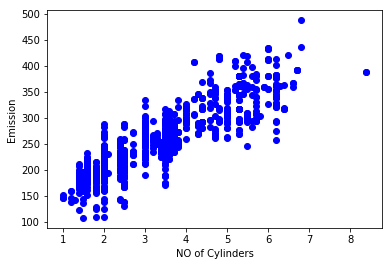

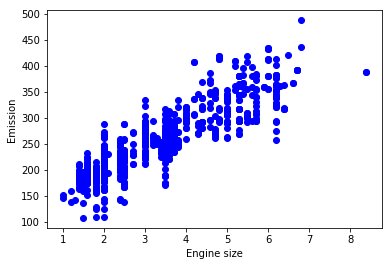

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

df= pd.read_csv("dataset/FuelConsumptionCo2.csv")

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
# plt.xlabel("NO of Cylinders")
# plt.ylabel("Emission")
# plt.show()

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")
# plt.show()

In [2]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

df= pd.read_csv("dataset/FuelConsumptionCo2.csv")

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

print('Coefficients: ',regr.coef_)
print('Intercept: ', regr.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))


Coefficients:  [[38.76442748]]
Intercept:  [125.66433706]
Mean absolute error: 23.63
Residual sum of squares (MSE): 954.81


### ii. Multiple Linear Regression

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

df = pd.read_csv("dataset/FuelConsumptionCo2.csv")

# df.head()

cdf = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]


#create a train and test subset of main dataset
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

mulregr = linear_model.LinearRegression()

# create train x and train y from train subset
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

mulregr.fit(train_x,train_y)

print("coefficient: ", mulregr.coef_)
print("intercepts: ", mulregr.intercept_)

# for testing purpose

test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_cap = mulregr.predict(test_x)

print("mean square error: ", np.mean((test_y_cap - test_y)**2))
print('Variance score: ', mulregr.score(test_x,test_y))


coefficient:  [[11.01735295  7.11394528  6.29940676  2.69541291]]
intercepts:  [68.47633203]
mean square error:  562.8983578256053
Variance score:  0.8712586642338218


### iii. Non Linear Regression

#### 1. Polynomial Regression

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('./dataset/FuelConsumptionCo2.csv')

cdf = df[['ENGINESIZE','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)

polyregr = linear_model.LinearRegression()

polyregr.fit(train_x_poly,train_y)

print("Coefficient: ", polyregr.coef_)
print("intercept: ", polyregr.intercept_)

#testing part

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_cap = polyregr.predict(test_x_poly)

#mean square error
print('Variance score: ', polyregr.score(test_x_poly,test_y))
print('mean square error: ', np.mean((test_y_cap - test_y) **2))

Coefficient:  [[ 0.         31.18108436  3.51194393 -0.4054648 ]]
intercept:  [129.98006458]
Variance score:  0.7823594679346654
mean square error:  922.3287519729147


#### 2. Non Linear Regression

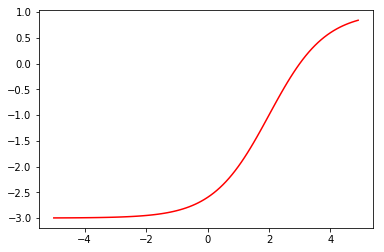

In [15]:
# Various non linear plots

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.1)

# y = np.power(x,2)
# y = np.exp(x)
# y = np.log(x)
y = 1-4/(1+np.power(3, x-2))

plt.plot(x,y,'r')

408.85667982655997 0.9875441063236878
Mean square error:-  2.0650891808937657e+24


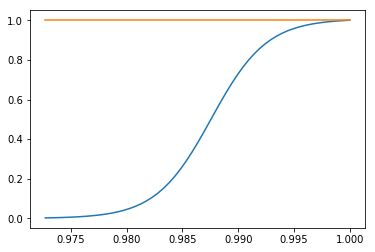

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv('./dataset/china_gdp.csv')

#This graph looks like a sigmoid graph

def sigmoid(x, beta_1, beta_2):
    graph = 1/(1 + np.exp( -beta_1*(x - beta_2)))
    return graph

x = np.linspace(1960, 2015, 55)
x = x/max(x)

y = sigmoid(x, )

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

train_x =

### 2.Classification

Classification referres to categorizing some unknown items into a discrete set of categories or classes.
It includes following types of algorithim:- 
    1. K-Nearest Neighbor
    2. SVM (Support Vector Machine)
    3. Neural Network
    4. Decision Tree
    5. Logistic Regression

### K-Nearest Neighbor
     Gives alternate method to create train and test set 

In [58]:
import itertools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

df = pd.read_csv('dataset/teleCust1000t.csv')

df['custcat'].value_counts() #use this to know the frequency 

X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

y = df[['custcat']].values

# Normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Alternate method for making train and test sample set -------------------------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 4)
# print('Train set: ',X_train.shape, y_train.shape)
# print('Test set: ',X_test.shape, y_test.shape)

#-------------------------------------------------------------------------------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier  
k =4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat = neigh.predict(X_test)

#-------------------------------------------------------------------------------------------------------------------------
#In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

from sklearn import metrics
# print('train set accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
# print('test set accuracy: ', metrics.accuracy_score(y_test, neigh.predict(X_test)))


#To check the appropriate value of k use this method

ks = 10
mean_acc = np.zeros((ks-1))
ConfusionMx = [];
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
The best accuracy was with 0.34 with k= 9


C:\Users\Lakshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Lakshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Lakshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Lakshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Lakshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning

### Decision Tree
     Also provides a method to convert categorical data to numeric data

In [66]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('dataset/drug200.csv')

df

X = df[['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

# As Sex, BP and Cholestrol have categorical values therfore we need to convert them into numerical values
from sklearn import preprocessing 

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])

le_bp = preprocessing.LabelEncoder()
le_bp.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_bp.transform(X[:,2])

le_cho = preprocessing.LabelEncoder()
le_cho.fit(['NORMAL','HIGH'])
X[:,3] = le_cho.transform(X[:,3])

X[0:5]

y = df[['Drug']]

#-------------------------------------------------------------------------------------------------------------------------
#Train and Test Set Formation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

#-------------------------------------------------------------------------------------------------------------------------
#Now its time for decision tree formation

drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4).fit(X_train,y_train)
yhat = drugTree.predict(X_test)

#-------------------------------------------------------------------------------------------------------------------------
#Evaluation

from sklearn import metrics
import matplotlib.pyplot as plt
print('DecisionTree Accuracy: ', metrics.accuracy_score(y_test, yhat))


DecisionTree Accuracy:  0.9833333333333333


### Support Vector Machine (SVM)
     Also to convert some obj data to numeric

C:\Users\Lakshay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lakshay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM accuracy:  0.9635036496350365
SVM jaccard test:  0.9635036496350365
F1 score:  0.9639038982104676
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


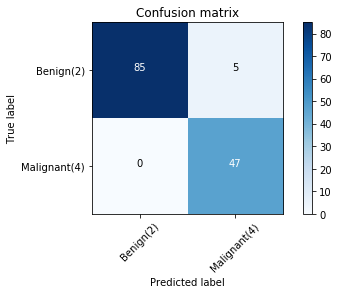

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# step1 load the data
df = pd.read_csv('dataset/cell_samples.csv')
df = df[pd.to_numeric(df['BareNuc'],errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

#Step2 Convert the data into array format
X = df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']].values
y = df[['Class']].values

#step3 Make train and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4 )
X_train.shape
y_train.shape

#step4 Modeling
from sklearn import svm
svmachine = svm.SVC(kernel = 'rbf') #other option for kernel includes linear, polynomial, sigmoid
svmachine.fit(X_train,y_train)

yhat = svmachine.predict(X_test)

#step5 Evaluation
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn.metrics import f1_score 
print('SVM accuracy: ', metrics.accuracy_score(y_test, yhat))
print('SVM jaccard test: ',jaccard_similarity_score(y_test, yhat))
print('F1 score: ',f1_score(y_test, yhat, average='weighted'))

#Miscellaneous
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

                 

### Logistic Regression